In [5]:
### 사전준비
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette="Set1")
sns.set_style('white')
import numpy as np 
from matplotlib import font_manager, rc
import platform
import json
import folium
if platform.system() == "Windows" :
    path = "c:/Windows/Fonts/Malgun.ttf"
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc("font", family = font_name)
elif platform.system() == "Drawin" :
    rc("font",family = "AppleGothic")
else :
    print("check your OS system...")
plt.rcParams["axes.unicode_minus"] = False
from bs4 import BeautifulSoup
import requests
from openpyxl.workbook import Workbook
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import random

In [6]:
file_path = "./2017-2019_통합본.csv"
df = pd.read_csv(file_path)
df

,Q1,Q2A1,Q2A2,Q2A3,Q2A4,Q2A5,Q5_2A1,Q5_2A2,Q5_2A3,Q9_2A1,...,Q10_1B10,Q10_1B11,Q10_1B12,Q10_1B13,Q10_1B14,Q10_1B15,Q10_1B16,Q10_1B17,CQ14_2_7,D_YEAR
0,1.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2017-03
1,18.0,NaN,2.0,NaN,NaN,NaN,3.0,4.0,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,1.0,2017-11
2,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,...,NaN,11.0,NaN,13.0,NaN,NaN,NaN,NaN,1.0,2017-06
3,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2017-02
4,1.0,1.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2017-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43671,2.0,1.0,NaN,NaN,NaN,NaN,10.0,4.0,11.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2019-01
43672,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2019-01
43673,1.0,1.0,NaN,NaN,NaN,NaN,9.0,2.0,1.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2019-12
43674,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2019-05


In [8]:
df["YEAR"] = np.nan
for i in range(len(df)) :
    df.loc[i,"YEAR"] = df["D_YEAR"][i][:4]
df["MONTH"] = np.nan
for i in range(len(df)) :
    df.loc[i,"MONTH"] = df["D_YEAR"][i][5:]
df

,Q1,Q2A1,Q2A2,Q2A3,Q2A4,Q2A5,Q5_2A1,Q5_2A2,Q5_2A3,Q9_2A1,...,Q10_1B12,Q10_1B13,Q10_1B14,Q10_1B15,Q10_1B16,Q10_1B17,CQ14_2_7,D_YEAR,YEAR,MONTH
0,1.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2017-03,2017,03
1,18.0,NaN,2.0,NaN,NaN,NaN,3.0,4.0,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,17.0,1.0,2017-11,2017,11
2,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,...,NaN,13.0,NaN,NaN,NaN,NaN,1.0,2017-06,2017,06
3,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2017-02,2017,02
4,1.0,1.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2017-08,2017,08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43671,2.0,1.0,NaN,NaN,NaN,NaN,10.0,4.0,11.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2019-01,2019,01
43672,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2019-01,2019,01
43673,1.0,1.0,NaN,NaN,NaN,NaN,9.0,2.0,1.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2019-12,2019,12
43674,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2019-05,2019,05


In [4]:
ym_list = []
for t in range(36) :
    ym = (str(2017 + t//12))+"-"+(str(1 + t % 12).zfill(2))
    ym_list.append(ym)
m_list = []
for t in range(12) :
    m = (str(1 + t).zfill(2))
    m_list.append(m)

In [5]:
dic1 = {1: '일본',2: '중국' ,3: '홍콩',
    4: '싱가포르',5: '대만',6: '태국',
    7: '말레이시아',8: '호주' ,9: '미국',
    10: '캐나다' ,11: '영국',12: '독일',
    13: '프랑스',14: '러시아',15: '중동',
    16: '인도',17: '필리핀',18: '인도네시아',
    19: '베트남',97: '기타'}
dic2 = {1: '음식/\n미식탐방',2: '쇼핑',3: '자연경관\n감상',
    4: "역사/문화/\n전통문화\n체험",5: "패션/유행/\n현대문화\n체험" ,6: "K-POP/\n한류관광",
    7: "유흥/오락",8: "뷰티/\n의료관광",9: "스포츠/\n레저관광",
    10: "휴가",11: "자국과의\n이동거리",12: "경제적인\n여행비용",
    13: "기타"}
df = df.replace({'D_GEN':{1:'남성', 2:'여성'},
                     "D_COU1":dic1,"Q5_2A1":dic2,
                     "Q5_2A2":dic2,"Q5_2A3":dic2})

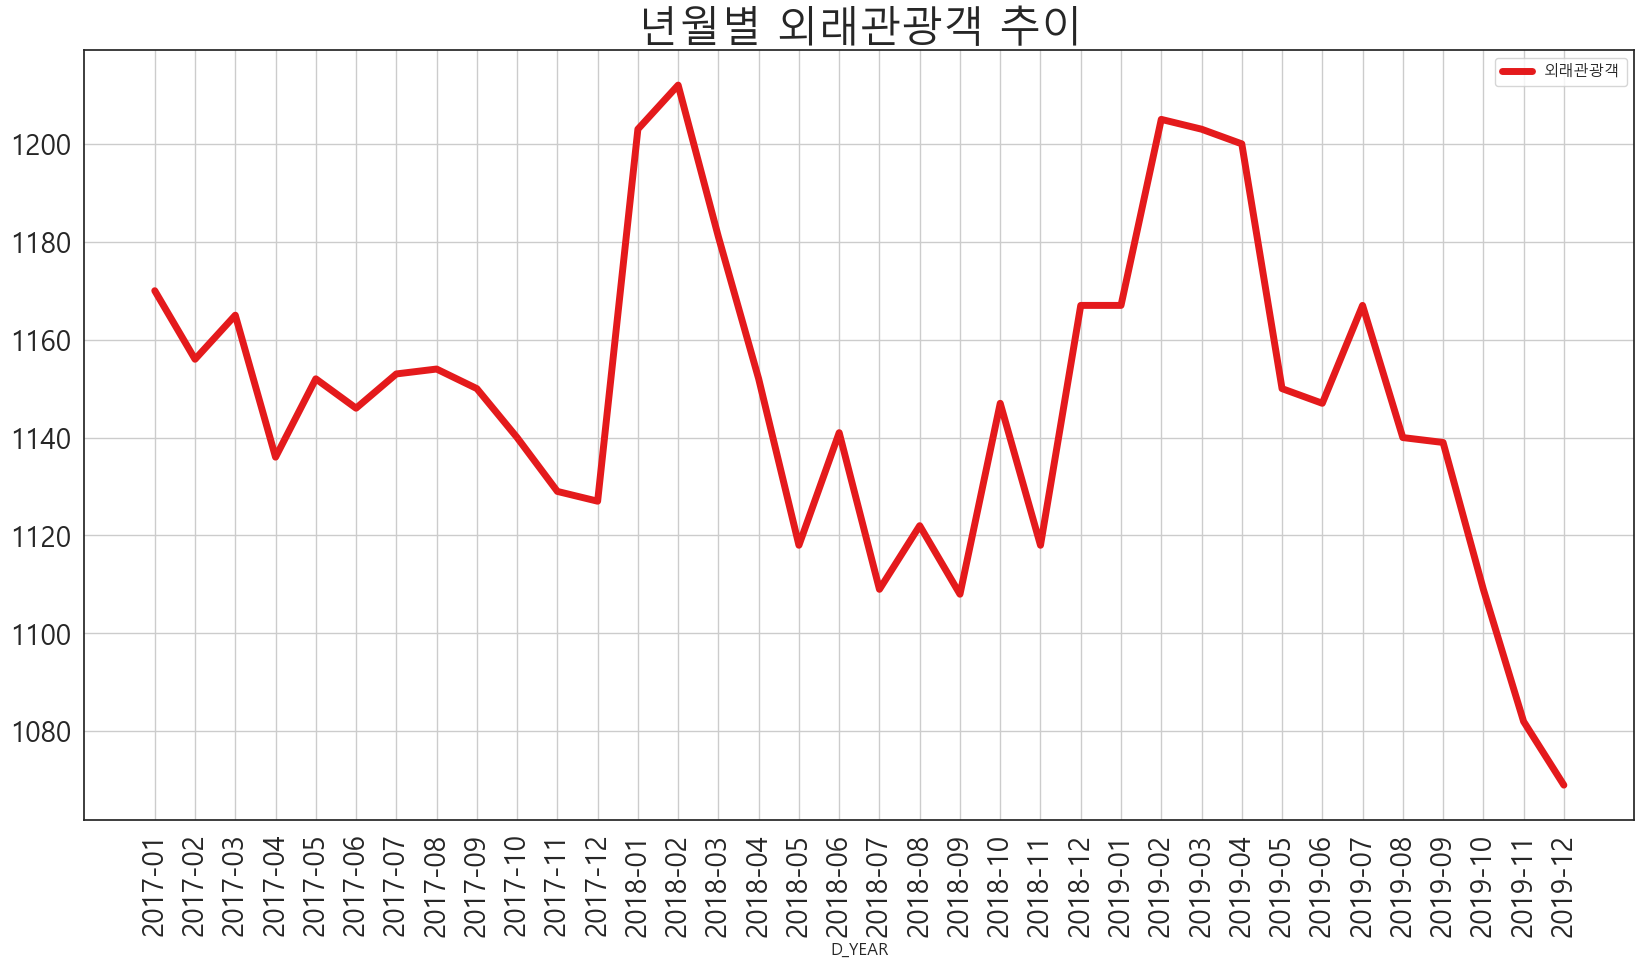

In [6]:
df_piv1 = df.pivot_table(values="ID",index="D_YEAR",aggfunc="count")
plt.rcParams["figure.figsize"]=(20,10)
df_piv1.plot(lw=5)
plt.xticks(range(36),ym_list,rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.title("년월별 외래관광객 추이",fontsize=30)
plt.legend(loc=1,labels=["외래관광객"])
plt.grid()
plt.show()

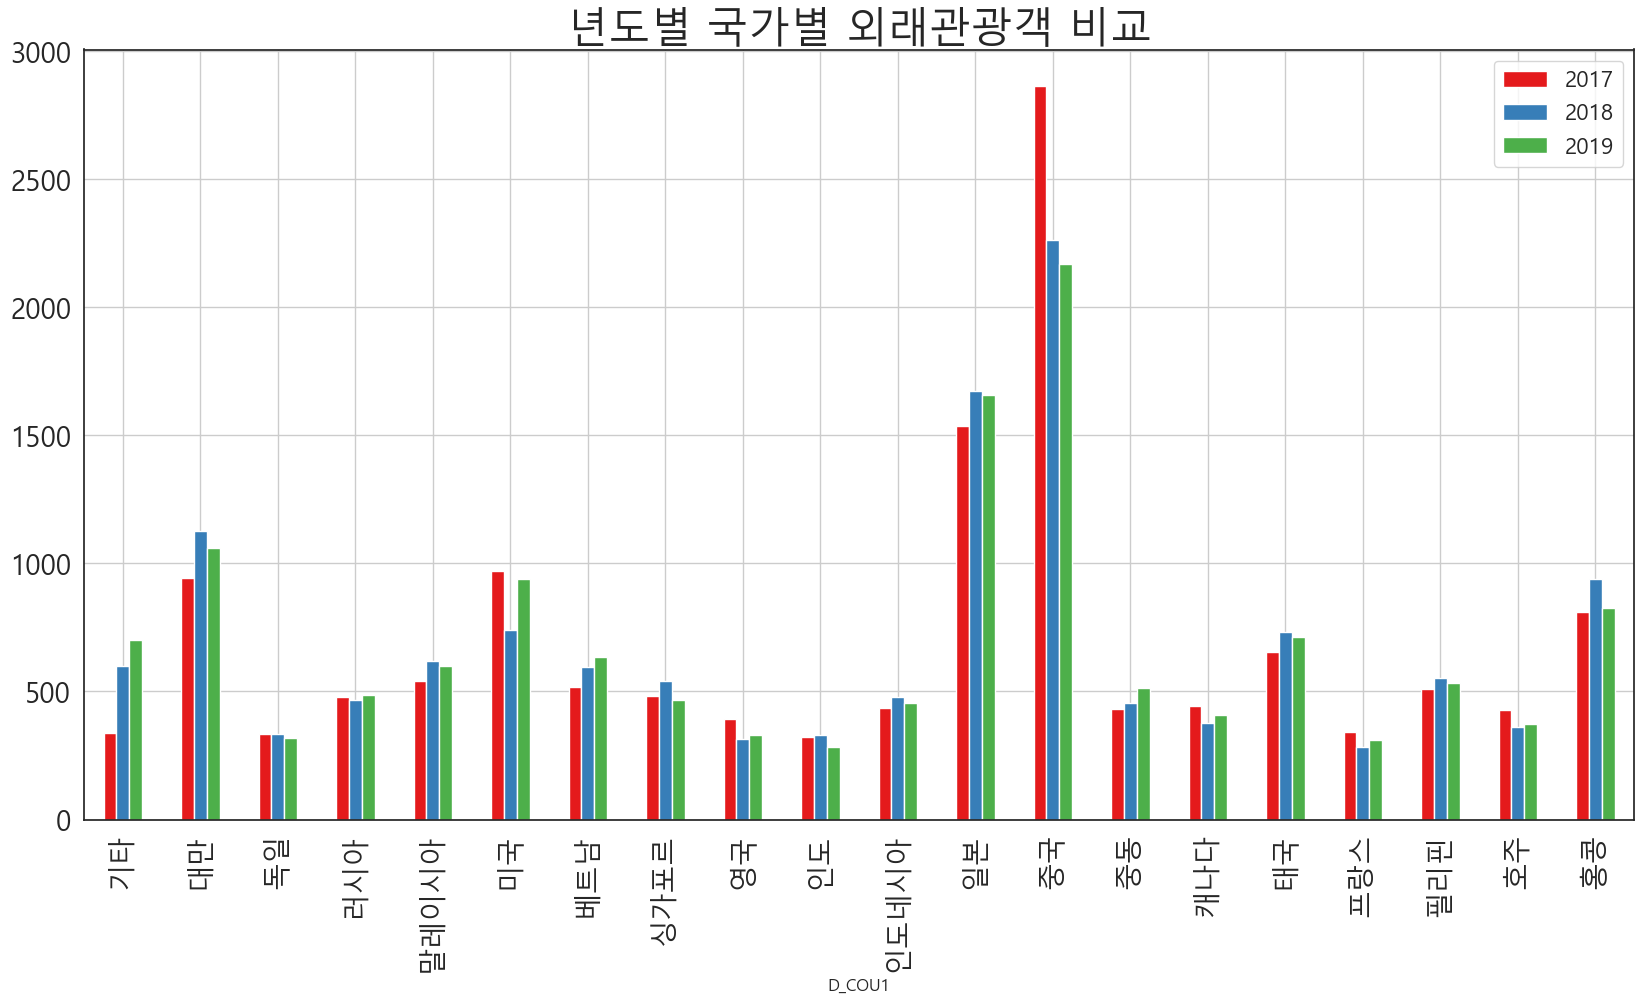

In [7]:
df_9 = df.pivot_table(values="ID", index="D_COU1", columns="YEAR", aggfunc="count")
df_9.plot(kind="bar")
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)
plt.legend(fontsize=16,loc=1)
plt.grid()
plt.title("년도별 국가별 외래관광객 비교",fontsize=30)
plt.show()

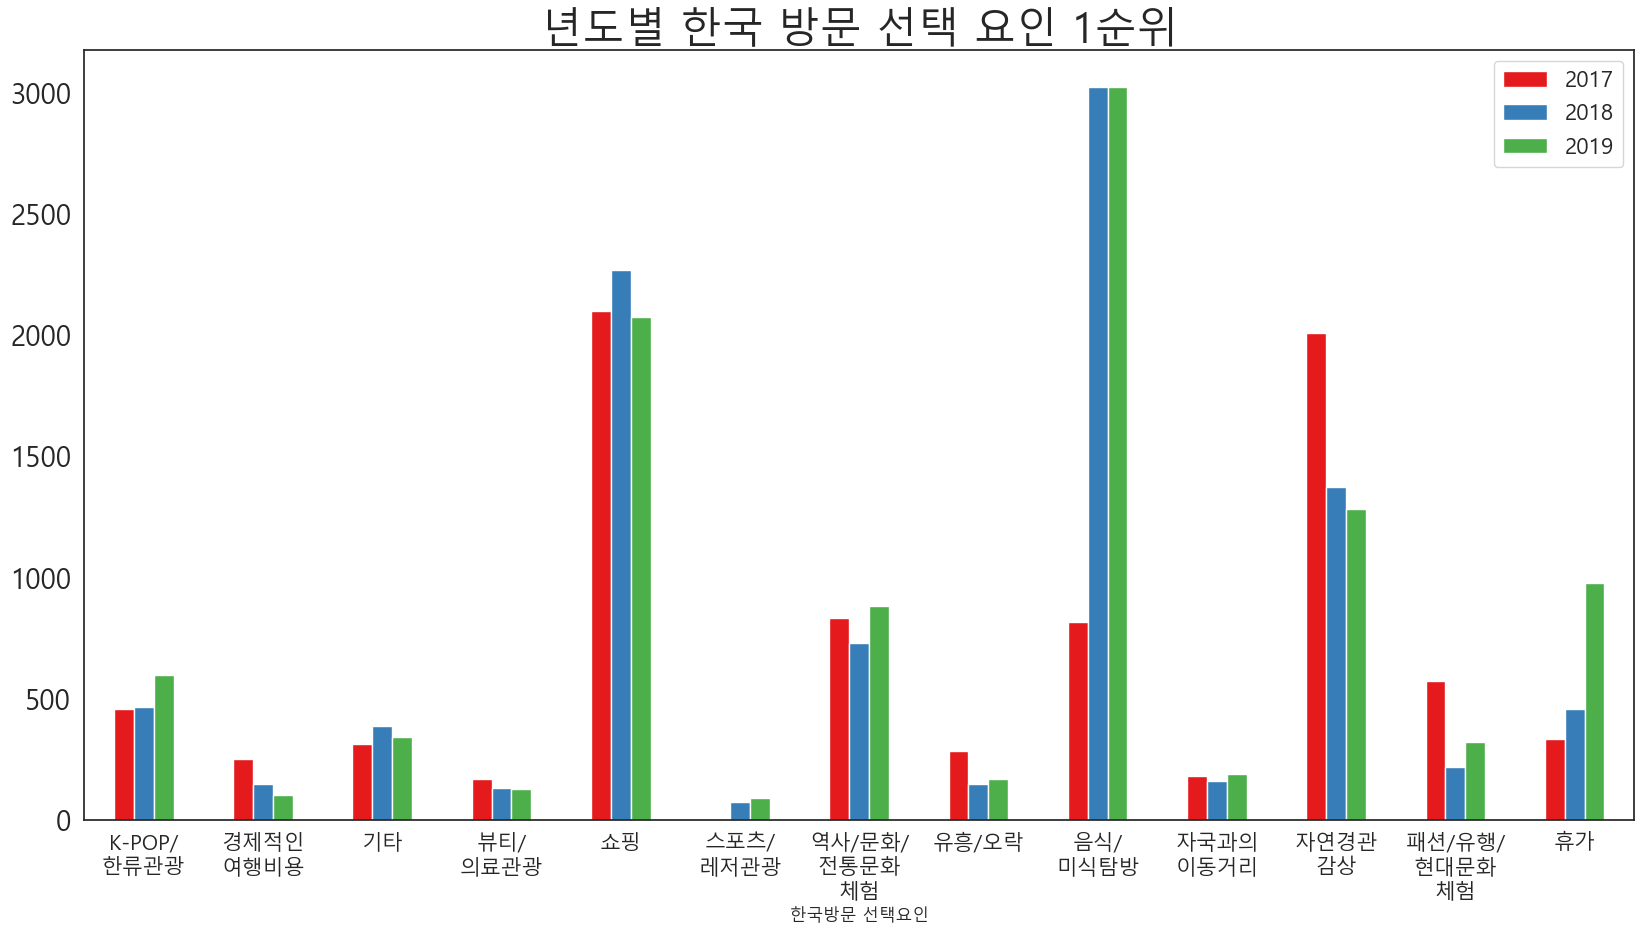

In [9]:
plt.rcParams["figure.figsize"]=(20,10)
df_piv5 = df.pivot_table(values="ID", index="Q5_2A1", columns="YEAR", aggfunc="count")
df_piv5.plot(kind="bar")
plt.xlabel("한국방문 선택요인")
plt.xticks(rotation=0,fontsize=15)
plt.yticks(fontsize=20)
plt.title("년도별 한국 방문 선택 요인 1순위",fontsize=30)
plt.legend(loc=1,fontsize=16)
plt.show()

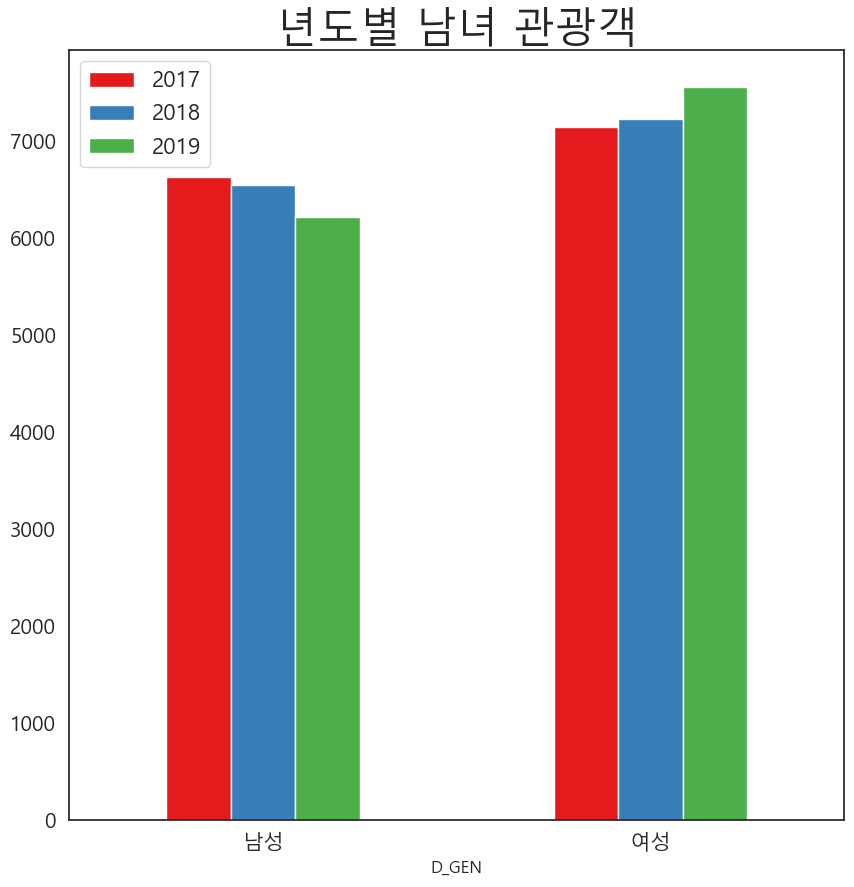

In [11]:
plt.rcParams["figure.figsize"]=(10,10)
sns.set_palette("Set1")
df1_piv8 = df.pivot_table(values="ID", index="D_GEN", columns="YEAR", aggfunc="count")
df1_piv8.plot(kind="bar")
plt.title("년도별 남녀 관광객".format(i+1),fontsize=30)
plt.xticks(rotation=0,fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=16,loc=0)
plt.show()

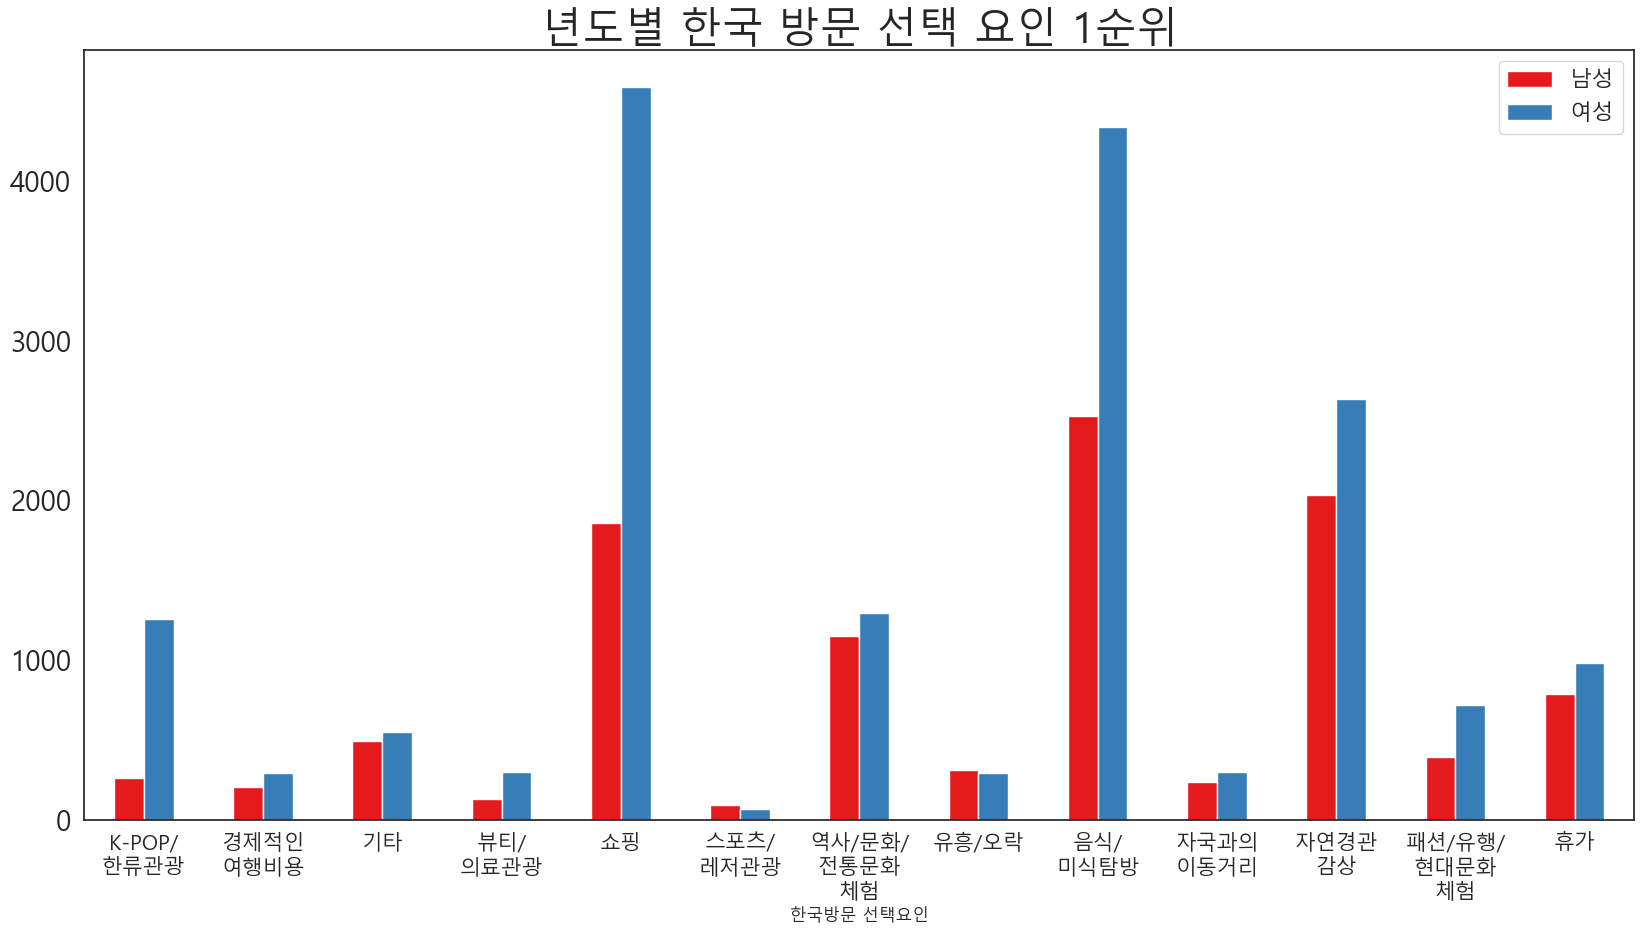

In [10]:
plt.rcParams["figure.figsize"]=(20,10)
df_piv5 = df.pivot_table(values="ID", index="Q5_2A1", columns="D_GEN", aggfunc="count")
df_piv5.plot(kind="bar")
plt.xlabel("한국방문 선택요인")
plt.xticks(rotation=0,fontsize=15)
plt.yticks(fontsize=20)
plt.title("년도별 한국 방문 선택 요인 1순위",fontsize=30)
plt.legend(loc=1,fontsize=16)
plt.show()